# The exploratory data analysis part is taken from KAGGLE

# Setting up

In [1]:
pip install pycountry-convert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 32.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.2/228.2 kB 19.9 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=be3e6e00784be2063af43d635c71f01c371ee770bb89e4e608804a00b6f85eaf
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy import stats
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

# Exploratory Data Analysis

In [4]:
df=pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### Visualizing Distributions of Different Features

<ipython-input-7-c3514ff8ce31>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], hist_kws=dict(edgecolor="k", linewidth=1, color='blue'), color='red')
<ipython-input-7-c3514ff8ce31>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], hist_kws=dict(edgecolor="k", linewidth=1, color=

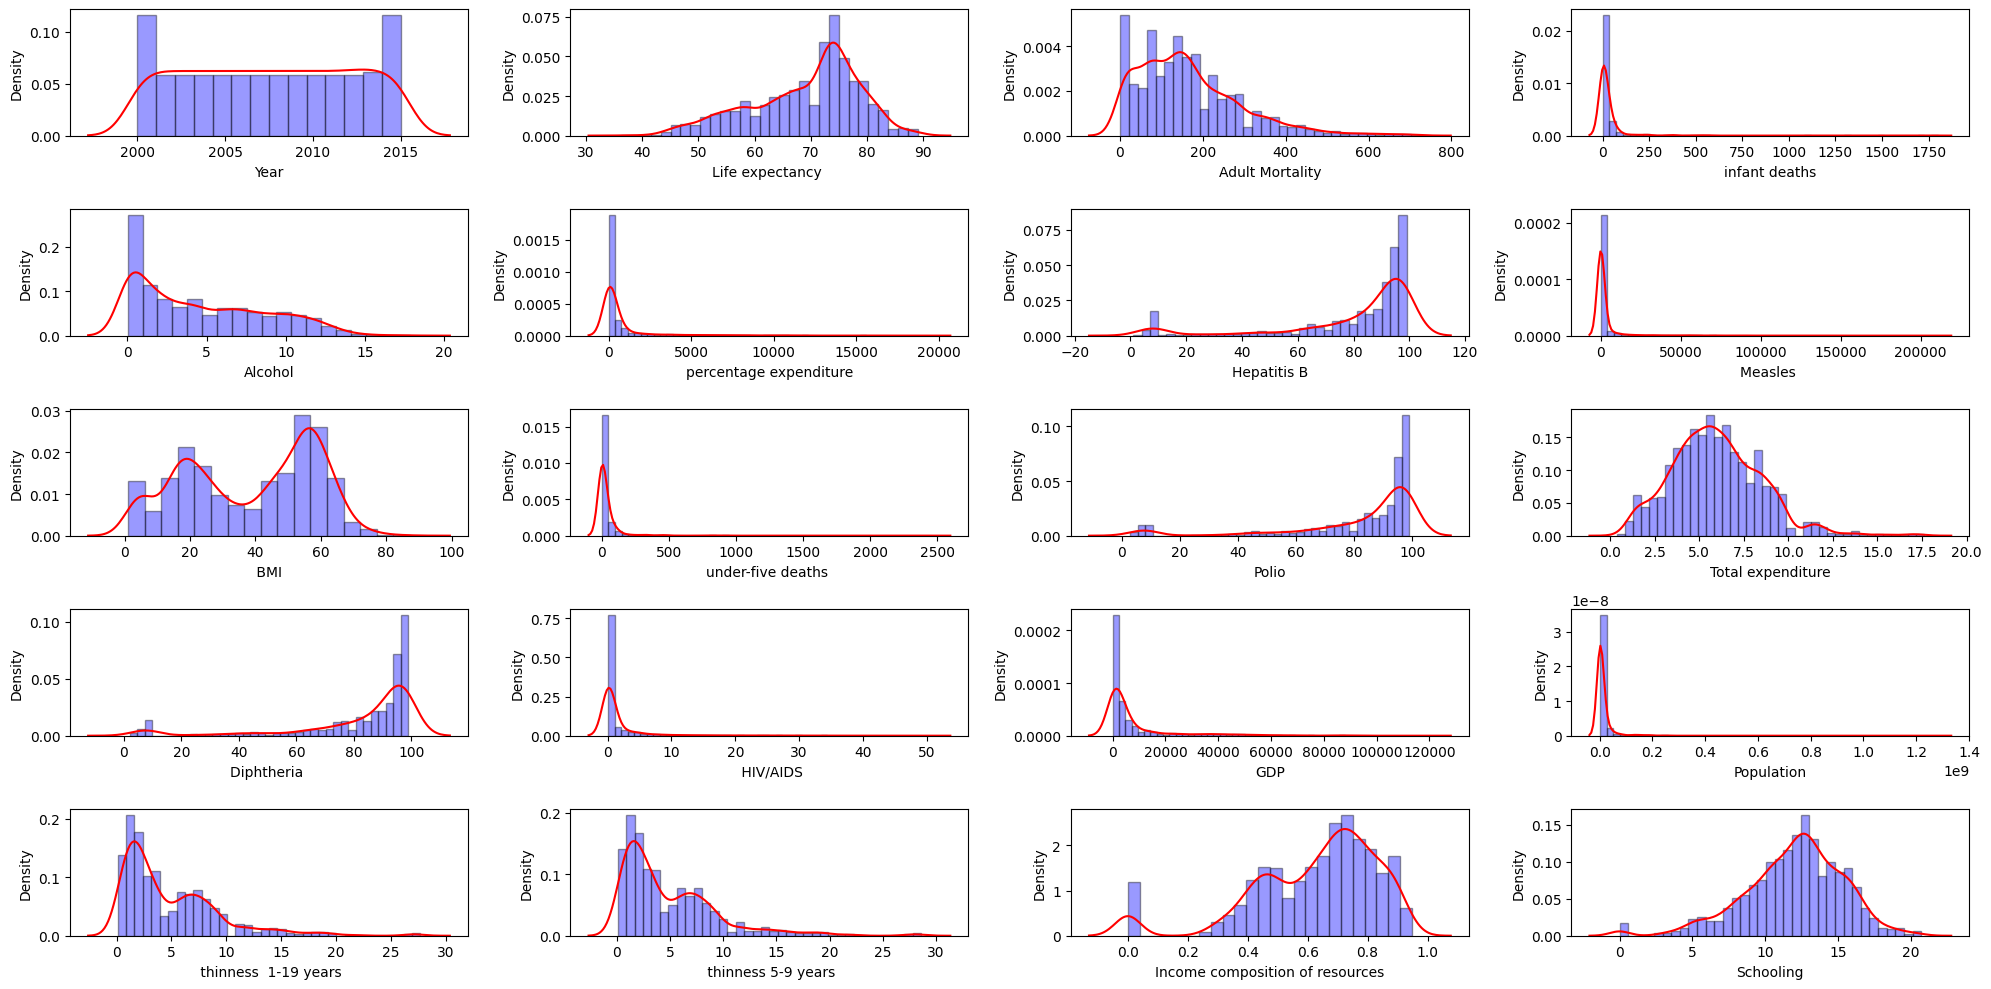

In [7]:
count = 1

fig = plt.figure(figsize = [20, 10])
cols = df.select_dtypes(exclude=['object']).columns.tolist()

for col in cols:
    plt.subplot(5, 4, count)
    sns.distplot(df[col], hist_kws=dict(edgecolor="k", linewidth=1, color='blue'), color='red')
    count += 1
plt.tight_layout()
plt.show()

### Visualizing outliers using Boxplot

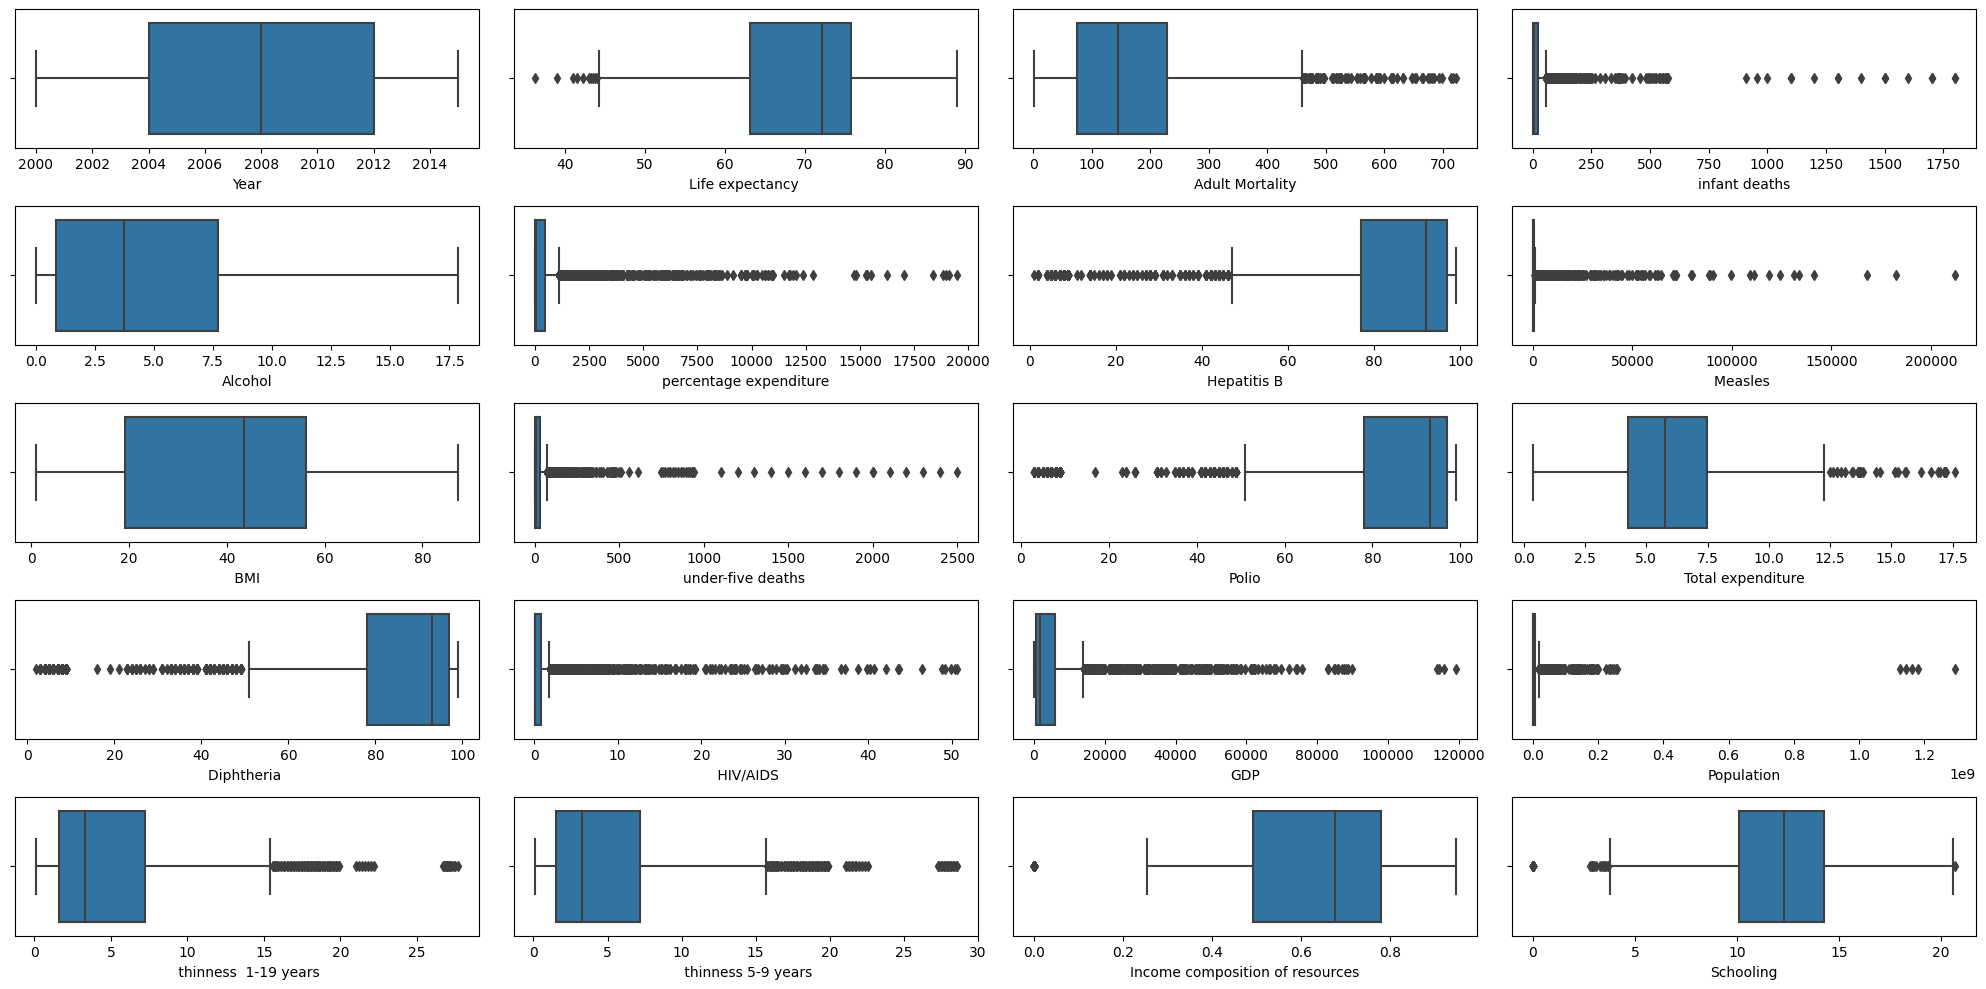

In [8]:
fig = plt.figure(figsize = [20, 10])
cols = df.select_dtypes(exclude=['object']).columns.tolist()

count=1
for col in cols:
    plt.subplot(5, 4, count)
    sns.boxplot(x = df[col])
    count += 1
plt.tight_layout()
plt.show()

### Bubble plot

In [9]:
import copy

continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}
continent = []
for country in df['Country']:
    try:
        continent.append(continents[(country_alpha2_to_continent_code(country_name_to_country_alpha2(country)))])
    except:
        continent.append("Africa")
    
df["Continent"] = continent
to_bubble = copy.deepcopy(df[["Country", "Year", "Life expectancy ", "GDP", "Population", "Continent"]])
to_bubble.dropna(inplace = True)

In [10]:
d = to_bubble.drop('Year', axis=1)
to_bubble = d.groupby(['Country', 'Continent']).mean().reset_index()
to_bubble['GDP'] = np.log10(to_bubble['GDP'])
to_bubble.head()

,Country,Continent,Life expectancy,GDP,Population
0,Afghanistan,Asia,58.19375,2.531499,9.972260e+06
1,Albania,Europe,75.15625,3.326280,6.969116e+05
2,Algeria,Africa,73.61875,3.454518,2.164983e+07
3,Angola,Africa,49.01875,3.295599,1.014710e+07
4,Argentina,South America,75.15625,3.845010,2.012120e+07


In [11]:
fig = px.scatter(to_bubble, x="GDP", y="Life expectancy ",
                 size="Population", color="Continent",
                 hover_name="Country", log_x=True, size_max=50)
fig.show()

### Removing outliers from the data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [13]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia


In [14]:
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[cols] < (Q1 - 1.7 * IQR)) | (df[cols] > (Q3 + 1.7 * IQR))).any(axis=1)

df = df[~outliers]

df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,Europe
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,Europe
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2,Europe
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2,Europe
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3,Europe


In [15]:
len(df)

1236

<ipython-input-16-b24ea790e980>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



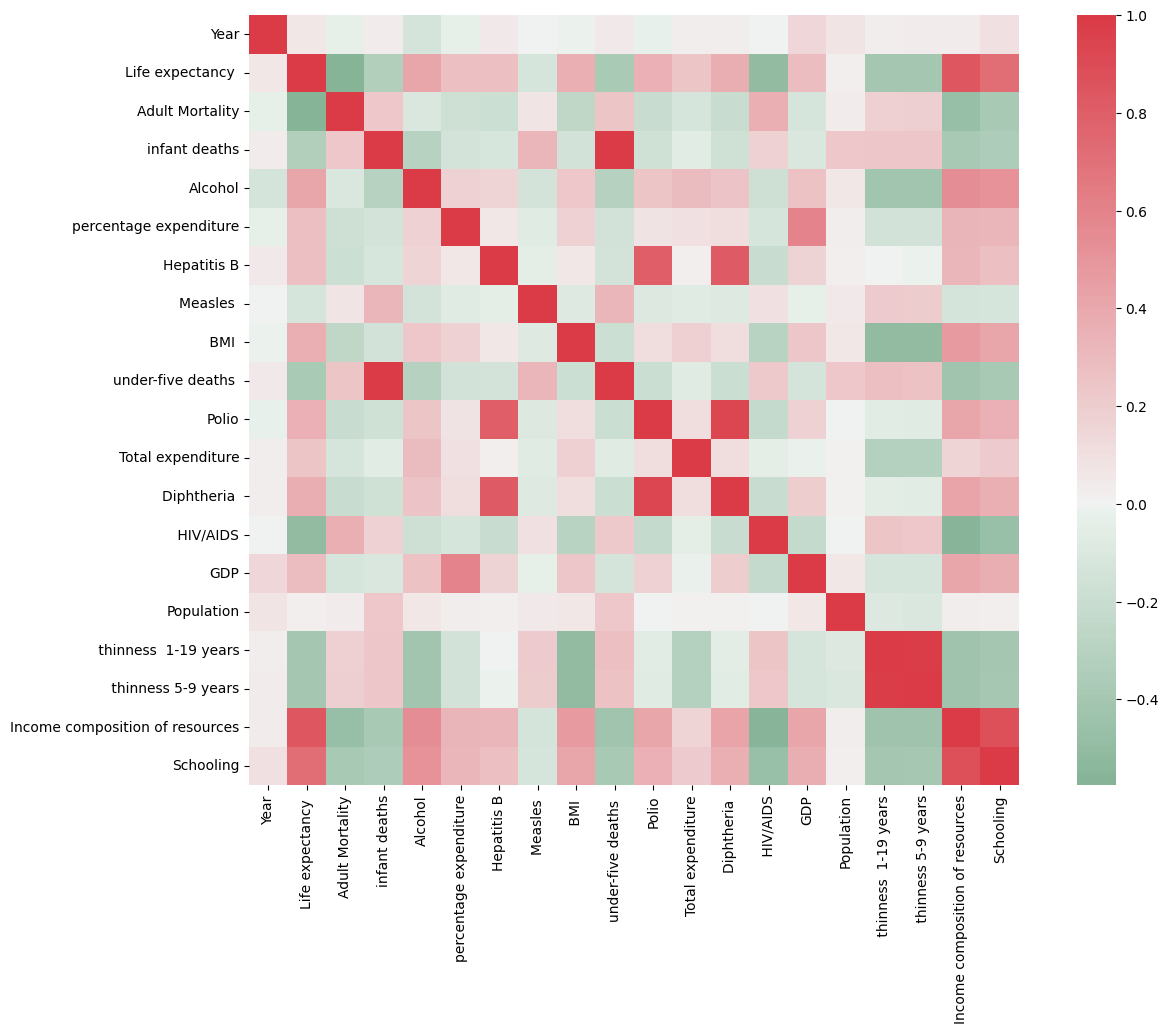

In [16]:
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(df.corr(), cmap =cmap, center=0, annot=False, square=True);

In [17]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Continent'],
      dtype='object')

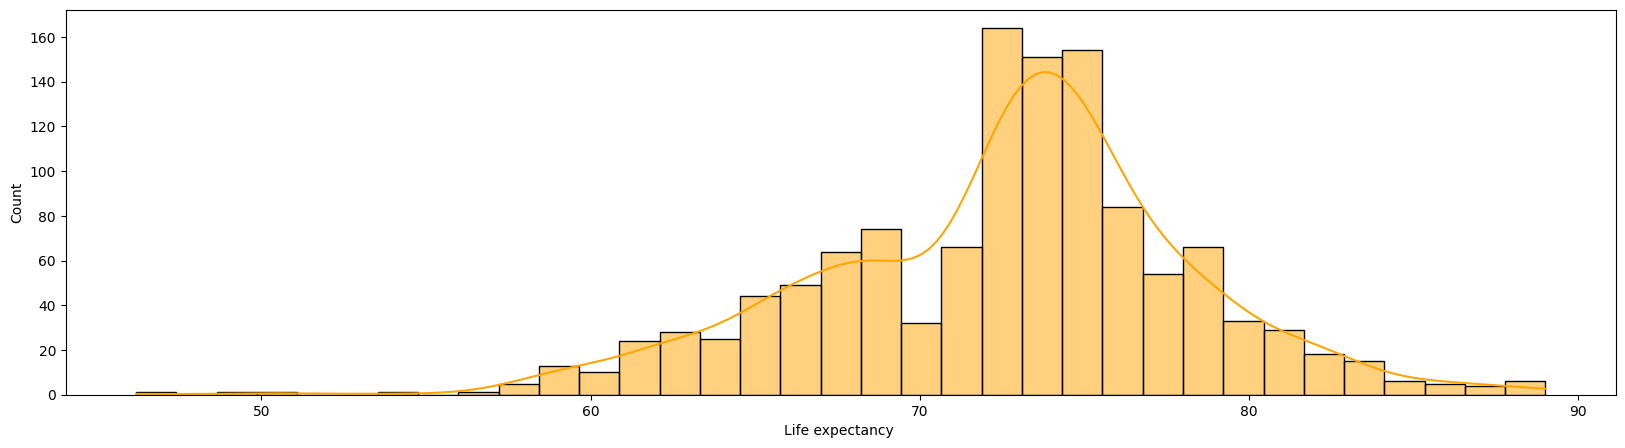

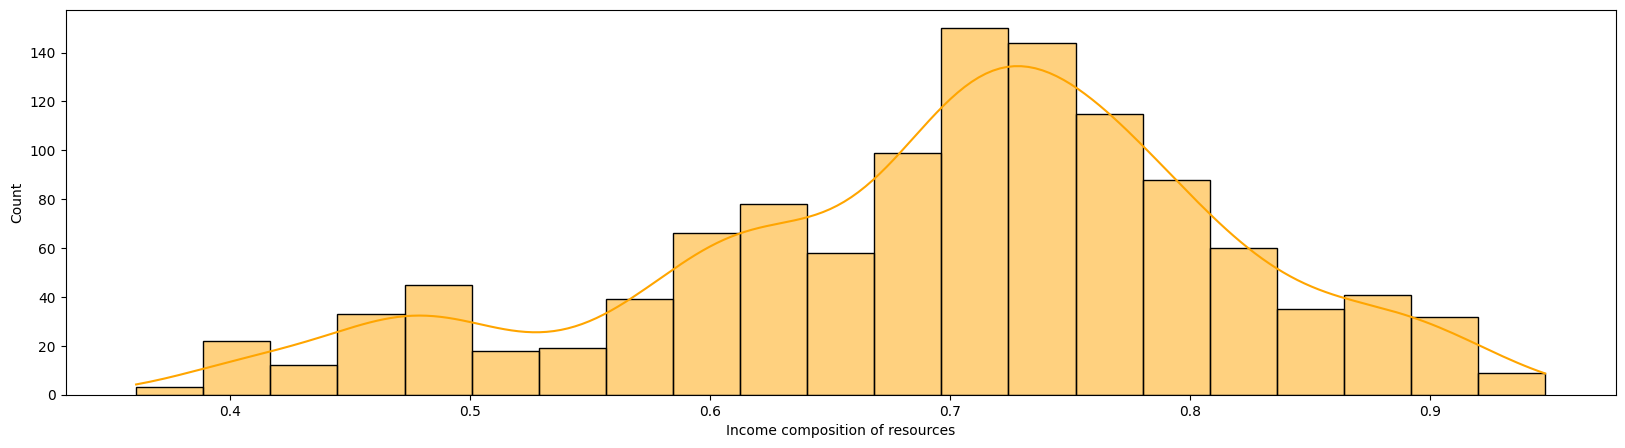

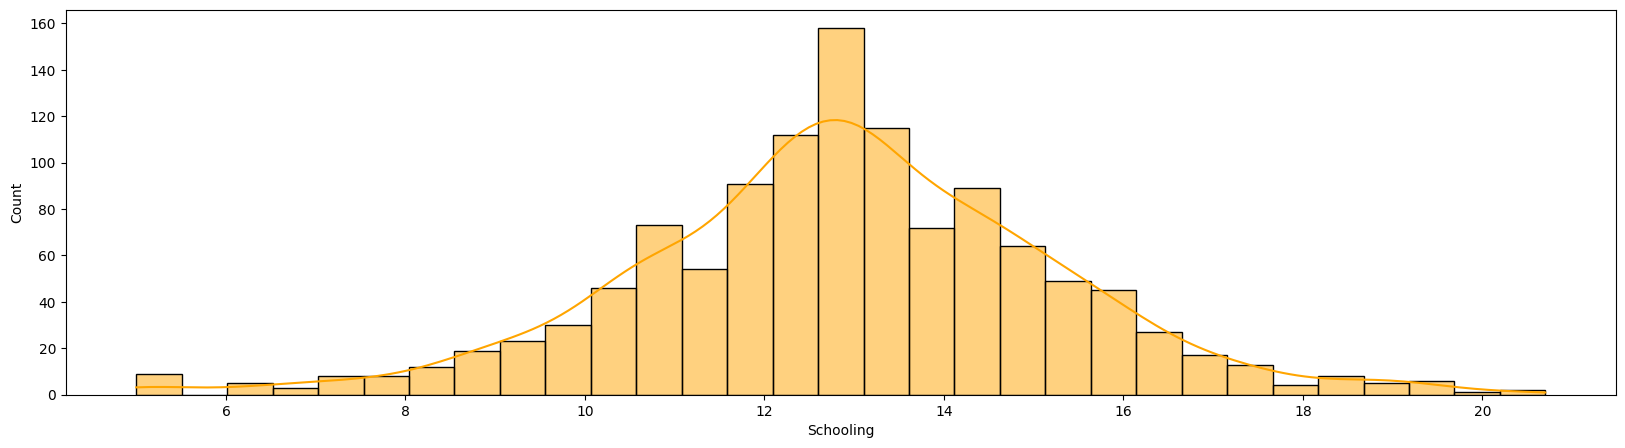

In [18]:
l= [df['Life expectancy '].dropna(), df['Income composition of resources'].dropna(), df['Schooling'].dropna()]
for i in l:
    plt.figure(figsize=(20,5))
    sns.histplot(i, kde=True, color="orange")

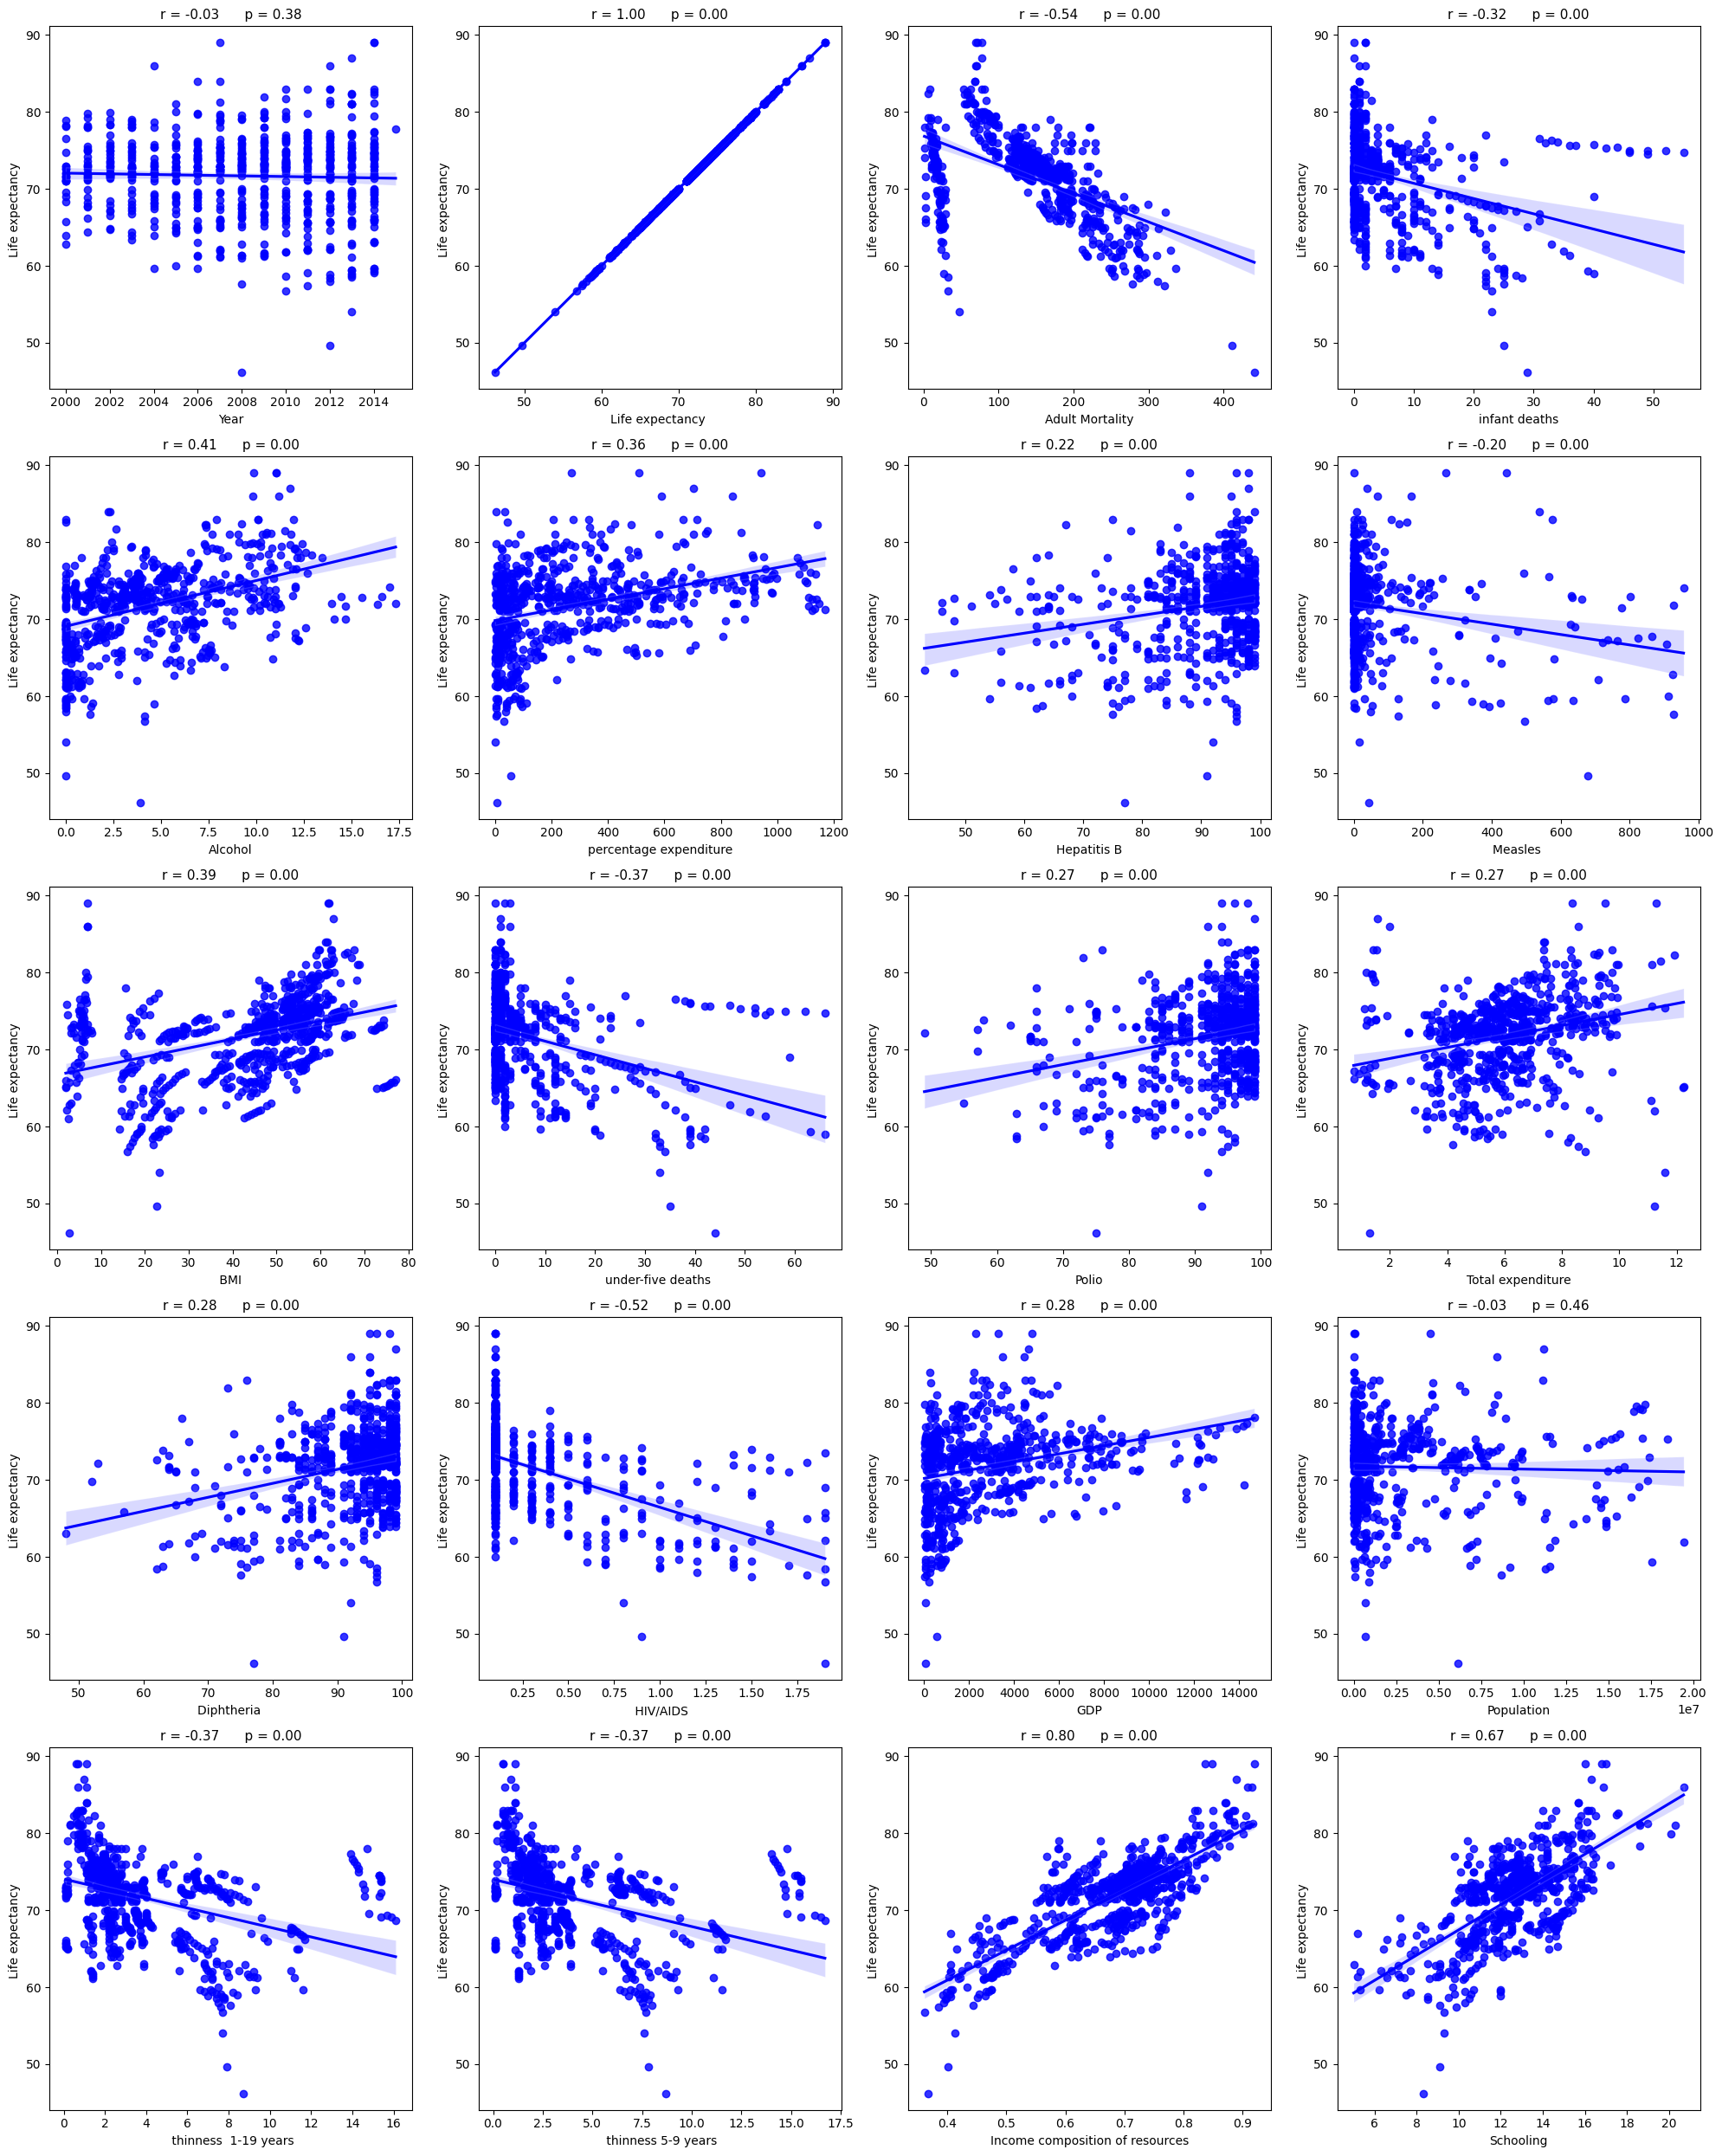

In [19]:
nr_rows = 5
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5,nr_rows*5))
numerical_feats = df.dtypes[df.dtypes != "object"].index
li_num_feats = list(numerical_feats)
li_not_plot = []
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]
df.dropna(inplace = True)

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(x = df[li_plot_num_feats[i]],y = df["Life expectancy "] , color = 'blue', ax = axs[r][c])
            stp = stats.pearsonr(df[li_plot_num_feats[i]], df["Life expectancy "])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
            
plt.tight_layout()    
sns.set(color_codes=True)
plt.show();

Above plot explains following trends:

Over the year, life expectancy has been increased slightly.
Life expectancy decreases with increase in infant's death.
Countries with high alchol consumption has high life expectancy. (I wonder how?)
BMI and life expectancy has a linear relationship.
Countries having chronic diseases has lower life expectancies.(Except Few)
GDP and Life expectancy has a strong linear relationship.
Countries with high population has slightly low life expectancy.
As total income composition of a country increases, life expectancy also increases. (If you're rich, you're expected to live a long life)
Last but not the least, schooling impacts the life expectancy as expected.

### impact of Alcohol consumption over Life Expectancy for different continents

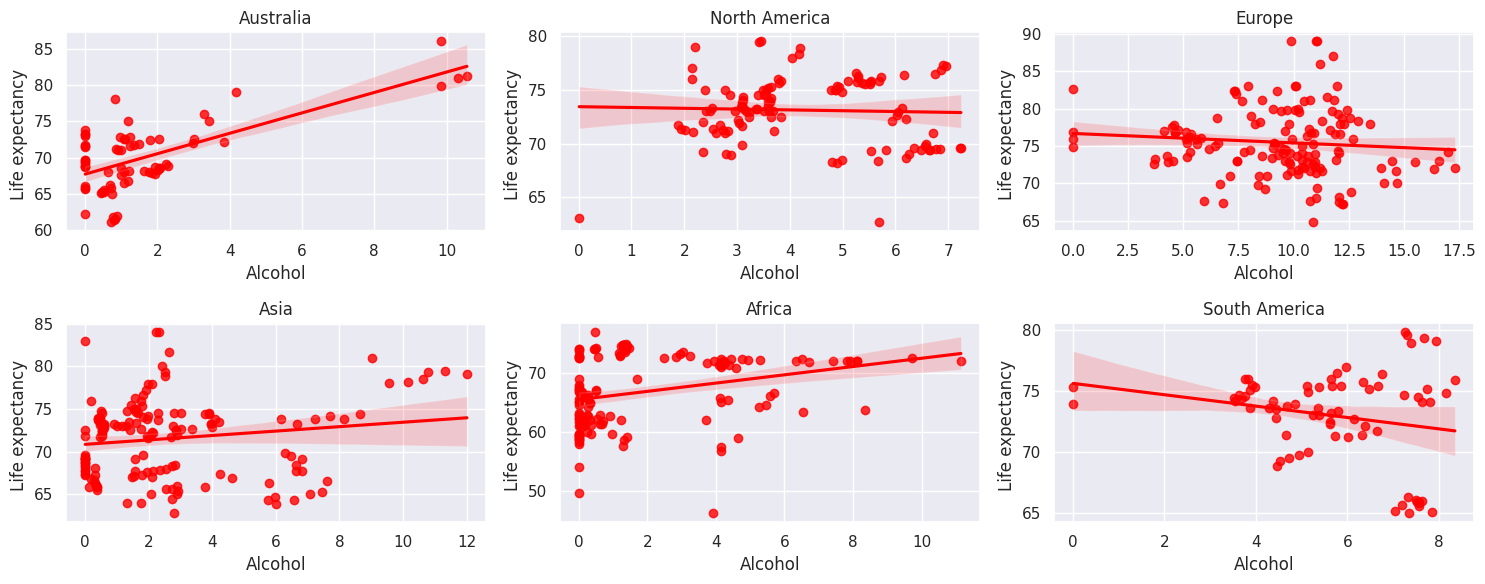

In [20]:
fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5)

for conts, ax in zip(set(df["Continent"]), axs.flat):
    Conts = df[df['Continent'] == conts]
    sns.regplot(x = Conts['Alcohol'],y = Conts["Life expectancy "], color = 'red', ax = ax).set_title(conts)

plt.tight_layout()    
sns.set(color_codes=True)
plt.show()

# Custom train test split

In [21]:
target = df["Life expectancy "]
features = df[df.columns.difference(['Life expectancy '])]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(pd.get_dummies(features), target, test_size=0.1)

In [22]:
continents = set(['Continent_Africa', 'Continent_Asia', 'Continent_Australia', 'Continent_Europe', 'Continent_North America', 'Continent_South America'])
countries = set(['Country_Albania', 'Country_Algeria', 'Country_Argentina', 'Country_Armenia', 'Country_Australia','Country_Austria', 'Country_Azerbaijan', 'Country_Belarus', 'Country_Belgium', 'Country_Belize', 'Country_Benin', 'Country_Bhutan', 'Country_Bosnia and Herzegovina', 'Country_Bulgaria', 'Country_Burkina Faso', 'Country_Burundi', 'Country_Cabo Verde', 'Country_Cambodia', 'Country_Chile', 'Country_Colombia', 'Country_Comoros', 'Country_Costa Rica', 'Country_Croatia',
 'Country_Cyprus', 'Country_Dominican Republic', 'Country_Ecuador', 'Country_El Salvador', 'Country_Eritrea', 'Country_Estonia', 'Country_Fiji', 'Country_France', 'Country_Georgia', 'Country_Germany', 'Country_Greece', 'Country_Guatemala', 'Country_Guinea', 'Country_Guyana', 'Country_Haiti', 'Country_Honduras', 'Country_Iraq', 'Country_Ireland', 'Country_Israel', 'Country_Italy', 'Country_Jamaica', 'Country_Jordan', 'Country_Kazakhstan', 'Country_Kiribati','Country_Latvia', 'Country_Lebanon', 'Country_Liberia', 'Country_Lithuania', 'Country_Luxembourg', 'Country_Madagascar', 'Country_Malaysia', 'Country_Maldives', 'Country_Malta', 'Country_Mauritania', 'Country_Mauritius',
 'Country_Mexico', 'Country_Mongolia', 'Country_Montenegro', 'Country_Morocco', 'Country_Nicaragua', 'Country_Panama', 'Country_Papua New Guinea', 'Country_Paraguay', 'Country_Peru', 'Country_Poland', 'Country_Portugal', 'Country_Romania', 'Country_Russian Federation', 'Country_Rwanda', 'Country_Samoa', 'Country_Sao Tome and Principe', 'Country_Senegal', 'Country_Serbia', 'Country_Seychelles', 'Country_Sierra Leone', 'Country_Solomon Islands', 'Country_Spain', 'Country_Sri Lanka', 'Country_Suriname', 'Country_Sweden', 'Country_Syrian Arab Republic', 'Country_Tajikistan', 'Country_Timor-Leste', 'Country_Togo', 'Country_Tonga', 'Country_Trinidad and Tobago', 'Country_Tunisia', 'Country_Turkey', 'Country_Turkmenistan', 'Country_Ukraine', 'Country_Uruguay', 'Country_Uzbekistan', 'Country_Vanuatu'])

In [23]:
list(X_test[getattr(X_test, 'Continent_Africa') == 1][countries].sum().sort_values(ascending=False)[:3].index)

<ipython-input-23-2a8bbd5545b9>:1: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



['Country_Comoros', 'Country_Tunisia', 'Country_Mauritius']

In [24]:
import random 

for continent in continents:
  X_temp = X_test[X_test[continent] == 1] # All samples belonging to a continent
  country_count = X_temp[countries].sum().sort_values(ascending=False) # See how many samples are there from each country
  non_zero = np.count_nonzero(country_count)
  used_countries = set(country_count[:non_zero].index) # Countries present so far
  for _ in range(non_zero, 3): # Runs until atleast 3 countries are present

    country_to_add = random.choice(list(countries.difference(used_countries)))
    used_countries.add(country_to_add)
    new_row = X_train[X_train[country_to_add] == 1].sample() # Randomly select sample from new country in train set
    X_test = X_test.append(new_row, ignore_index = True) # Add to test set
    X_train = X_train.drop(index=new_row.index) # Remove from the test set
    Y_test = Y_test.append(y_train.loc[new_row.index], ignore_index = True) # Add to test set
    Y_train = Y_train.drop(index=new_row.index) # Remove from the test set

  # For debugging
  X_temp = X_test[X_test[continent] == 1] # All samples belonging to a continent
  country_count = X_temp[countries].sum().sort_values(ascending=False) # See how many samples are there from each country
  non_zero = np.count_nonzero(country_count)
  used_countries = set(country_count[:non_zero].index) # Countries present so far
  print('in Test set, from continent of {} there are {} countries present'.format(continent[10:], non_zero))



in Test set, from continent of North America there are 7 countries present
in Test set, from continent of Africa there are 13 countries present
in Test set, from continent of South America there are 4 countries present
in Test set, from continent of Australia there are 6 countries present
in Test set, from continent of Europe there are 8 countries present
in Test set, from continent of Asia there are 13 countries present


<ipython-input-24-666811f95c46>:5: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

<ipython-input-24-666811f95c46>:20: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

<ipython-input-24-666811f95c46>:5: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

<ipython-input-24-666811f95c46>:20: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

<ipython-input-24-666811f95c46>:5: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

<ipython-input-24-666811f95c46>:20: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

<ipython-input-24-666811f95c46>:5: FutureWarning:

Passing a set as an indexer is deprecated and 

In [25]:
print(len(X_train), len(Y_train), len(X_test), len(Y_test))

633 633 71 71


# Model

In [26]:
np.shape(X_train)

(633, 126)

In [32]:
import torch.nn as nn
 
# Define the model
model = nn.Sequential(
    nn.Linear(126, 100),
    nn.ReLU(),
    nn.Linear(100, 1)
)

import torch.nn as nn
import torch.optim as optim
 
# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.00001)

In [33]:
import copy
import numpy as np
import torch
import tqdm
from sklearn.model_selection import train_test_split
 
# train-test
x_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(Y_train.to_numpy(), dtype=torch.float32).reshape(-1, 1)
x_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(Y_test.to_numpy(), dtype=torch.float32).reshape(-1, 1)
 

In [34]:
print(len(x_train), len(y_train), len(x_test), len(y_test))

633 633 71 71


In [35]:
# training parameters
n_epochs = 100   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(x_train), batch_size)
 
# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []
 
# training loop
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = x_train[start:start+batch_size]
            X_batch.requires_grad = True
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(x_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
 
# restore model and return best accuracy
model.load_state_dict(best_weights)

<All keys matched successfully>

MSE: 117.73
RMSE: 10.85


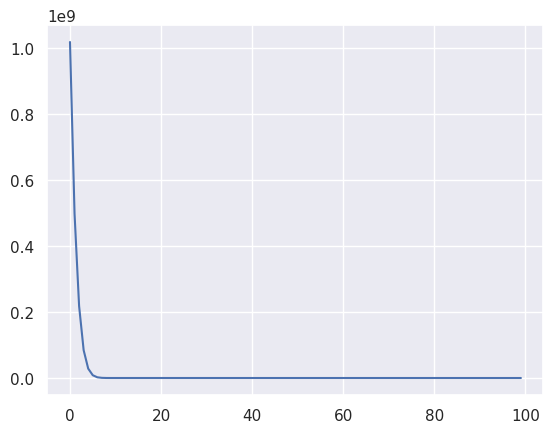

In [36]:
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

In [37]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.1 MB/s eta 0:00:00


# KernelSHAP

  0%|          | 0/71 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


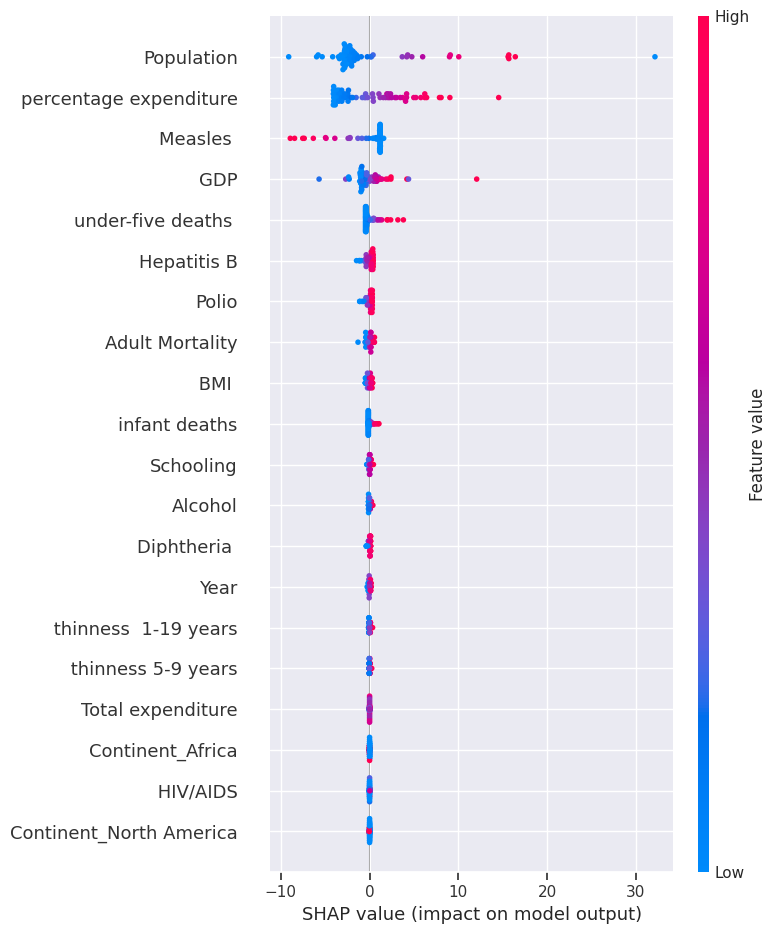

In [38]:
import torch
from torch.autograd import Variable
import shap
import numpy
import pandas

torch.set_grad_enabled(False)

# Get features
train_features_df = X_train # pandas dataframe
test_features_df = X_test # pandas dataframe

# Define function to wrap model to transform data to tensor
f = lambda x: model( Variable( torch.from_numpy(x) ) ).detach().numpy()

# Convert my pandas dataframe to numpy
data = test_features_df.to_numpy(dtype=np.float32)

# The explainer doesn't like tensors, hence the f function
explainer = shap.KernelExplainer(f, data)

# Get the shap values from my test data
shap_values = explainer.shap_values(data)

# Enable the plots in jupyter
shap.initjs()

feature_names = test_features_df.columns
# Plots
#shap.force_plot(explainer.expected_value, shap_values[0], feature_names)
#shap.dependence_plot("b1_price_avg", shap_values[0], data, feature_names)
shap.summary_plot(shap_values[0], data, feature_names)

In [58]:
(X_test.sum(axis=0))[80:110]

Country_Madagascar               1.0
Country_Malaysia                 1.0
Country_Maldives                 1.0
Country_Malta                    0.0
Country_Mauritania               1.0
Country_Mauritius                2.0
Country_Mexico                   0.0
Country_Mongolia                 1.0
Country_Montenegro               1.0
Country_Morocco                  0.0
Country_Nicaragua                0.0
Country_Panama                   0.0
Country_Papua New Guinea         1.0
Country_Paraguay                 0.0
Country_Peru                     0.0
Country_Poland                   0.0
Country_Portugal                 0.0
Country_Romania                  0.0
Country_Russian Federation       1.0
Country_Rwanda                   0.0
Country_Samoa                    1.0
Country_Sao Tome and Principe    2.0
Country_Senegal                  1.0
Country_Serbia                   2.0
Country_Seychelles               1.0
Country_Sierra Leone             0.0
Country_Solomon Islands          1.0
C

In [59]:
new_X_test = X_test.reset_index(drop=True)
turkey_sample = new_X_test[new_X_test['Country_Belgium'] == 1].sample(1)
Ukraine_sample = new_X_test[new_X_test['Country_Serbia'] == 1].sample(1)

In [66]:
np.shape(shap_values)

(1, 71, 126)

In [67]:
shap.initjs()

shap.force_plot(explainer.expected_value,
                              shap_values[0][turkey_sample.index,:],
                              turkey_sample)

In [68]:
shap.initjs()

shap.force_plot(explainer.expected_value,
                              shap_values[0][Ukraine_sample.index,:],
                              Ukraine_sample)

# DeepSHAP

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


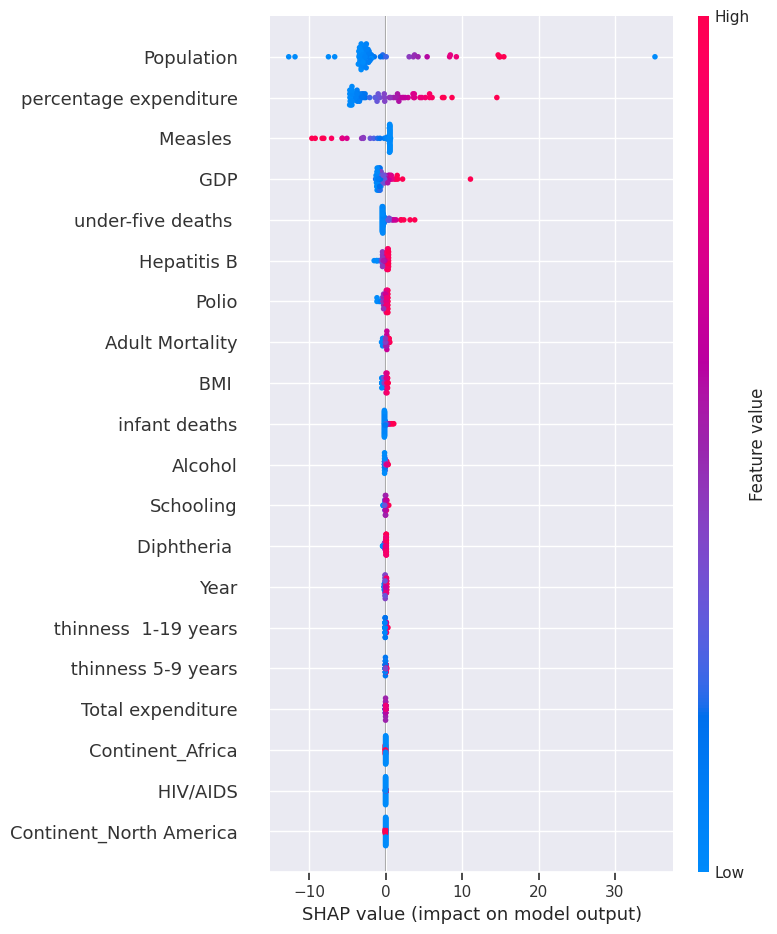

In [69]:
# It wants gradients enabled, and uses the training set
torch.set_grad_enabled(True)
e = shap.DeepExplainer(model, Variable( torch.from_numpy( train_features_df.to_numpy(dtype=np.float32) ) ) )

# Get the shap values from my test data (this explainer likes tensors)
shap_values = e.shap_values( Variable( torch.from_numpy(data) ) )

# Plots
#shap.force_plot(explainer.expected_value, shap_values, feature_names)
#shap.dependence_plot("b1_price_avg", shap_values, data, feature_names)
shap.summary_plot(shap_values, data, feature_names)

In [71]:
shap.initjs()

shap.force_plot(explainer.expected_value,
                              shap_values[turkey_sample.index,:],
                              turkey_sample)

In [72]:
shap.initjs()

shap.force_plot(explainer.expected_value,
                              shap_values[Ukraine_sample.index,:],
                              Ukraine_sample)